# Creating A Training Set From A1_D1 data


## Import pyMez and pyMez.Code.Analysis.SParameter  

In [1]:
import os
from pyMez import *
from pyMez.Code.Analysis.SParameter import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 0.545 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.128 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 2.544 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.013 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.161 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.01 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 0.699 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.022 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.017 s to import Code.Utils.Names
It took 4.139 s to import all of the active modules


## Define the files to be imported

In [2]:
pretrain_folder=r"C:\Share\WaveParameter Machine Learning\Pretrain"
pretrain_files=os.listdir(pretrain_folder)
pretrain_files=map(lambda x:os.path.join(pretrain_folder,x),pretrain_files)

## Join all the files using the fact they are descendants of AsciiDataTable

In [3]:
first_file=W2P(pretrain_files[0])
joined_file=first_file.copy()
for file_name in pretrain_files[1:]:
    joined_file=joined_file+W2P(file_name)

FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_1.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_10.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_100.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_11.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_12.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_13.w2p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Share\WaveParameter Machine Learning\Pretrain\iteration_14.w2p sucessfully parsed
FAILED to imp

## Creating a Mean and Standard Deviation w2p

In [4]:
mean_file=frequency_model_collapse_multiple_measurements(joined_file)

In [5]:
std_file=frequency_model_collapse_multiple_measurements(joined_file,method="std")

## Extracting the amplitudes

In [6]:
mean_A1_D1=[complex(re_A1_D1,mean_file["imA1_D1"][index]) for index,re_A1_D1 in enumerate(mean_file["reA1_D1"])]

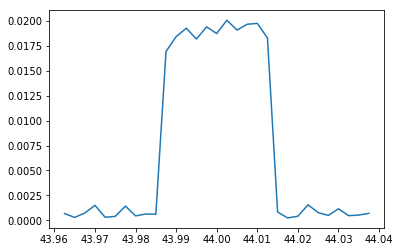

In [7]:
plt.plot(mean_file["Frequency"],np.abs(np.array(mean_A1_D1)))
plt.show()

In [8]:
std_A1_D1=np.abs(np.array([complex(re_A1_D1,std_file["imA1_D1"][index]) for index,re_A1_D1 in enumerate(std_file["reA1_D1"])]))

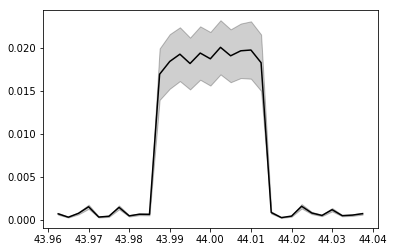

In [17]:
plt.fill_between(mean_file["Frequency"],np.abs(np.array(mean_A1_D1))-std_A1_D1,np.abs(np.array(mean_A1_D1))+std_A1_D1, 
                 edgecolor=(0, .0, .0, .25),
                        facecolor=(.25, .25, .25, .25),
                        linewidth=1)
plt.plot(mean_file["Frequency"],np.abs(np.array(mean_A1_D1)),'k')
plt.show()

## Building the Training Set

In [34]:
number_training_sets=1000
training_arrays=np.array([np.random.normal(loc=a1_d1,scale=std_A1_D1[index],
                                           size=number_training_sets) for index,
                          a1_d1 in enumerate(np.abs(np.array(mean_A1_D1)))])

training_arrays=[[training_arrays[i][j] for i in range(len(np.abs(np.array(mean_A1_D1))))] for j in range(number_training_sets)]

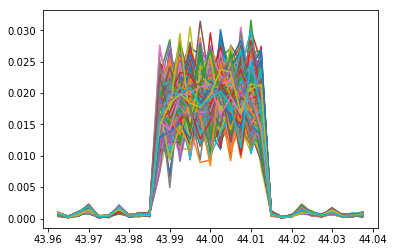

In [35]:
# Don't do this step if number_training_sets is BIG!!!
for training_array in training_arrays:
    plt.plot(mean_file["Frequency"],np.abs(training_array))

plt.show()

## Now try train_classifier with A1_D1 = training_arrays and classifier type as ..

In [36]:
def build_a1_d1_training_set_script(pretrain_directory,number_training_sets=1000):
    """builds a training set of input amplitudes for w2p based on a directory of measurements assumed to be good """
    pretrain_files=os.listdir(pretrain_directory)
    pretrain_files=map(lambda x:os.path.join(pretrain_directory,x),pretrain_files)
    first_file=W2P(pretrain_files[0])
    joined_file=first_file.copy()
    for file_name in pretrain_files[1:]:
        joined_file=joined_file+W2P(file_name)
    mean_file=frequency_model_collapse_multiple_measurements(joined_file)
    std_file=frequency_model_collapse_multiple_measurements(joined_file,method="std")
    mean_A1_D1=[complex(re_A1_D1,mean_file["imA1_D1"][index]) for index,re_A1_D1 in enumerate(mean_file["reA1_D1"])]
    std_A1_D1=np.abs(np.array([complex(re_A1_D1,std_file["imA1_D1"][index]) for index,re_A1_D1 in enumerate(std_file["reA1_D1"])]))
    #number_training_sets=1000
    training_arrays=np.array([np.random.normal(loc=a1_d1,scale=std_A1_D1[index],
                                               size=number_training_sets) for index,
                              a1_d1 in enumerate(np.abs(np.array(mean_A1_D1)))])

    training_arrays=[[training_arrays[i][j] for i in range(len(np.abs(np.array(mean_A1_D1))))] for j in range(number_training_sets)]
    return training_arrays